In [1]:
# Importing essential libraries
import pandas as pd
import pickle
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ipl_df = pd.read_csv('C:\\Users\\pavan\\ML\\IPL\\ipl.csv')
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
ipl_df.dtypes
#date,venue,bat_team,bowl_team,batsman,bowler -- categorical Features

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [5]:
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
ipl_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
ipl_df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

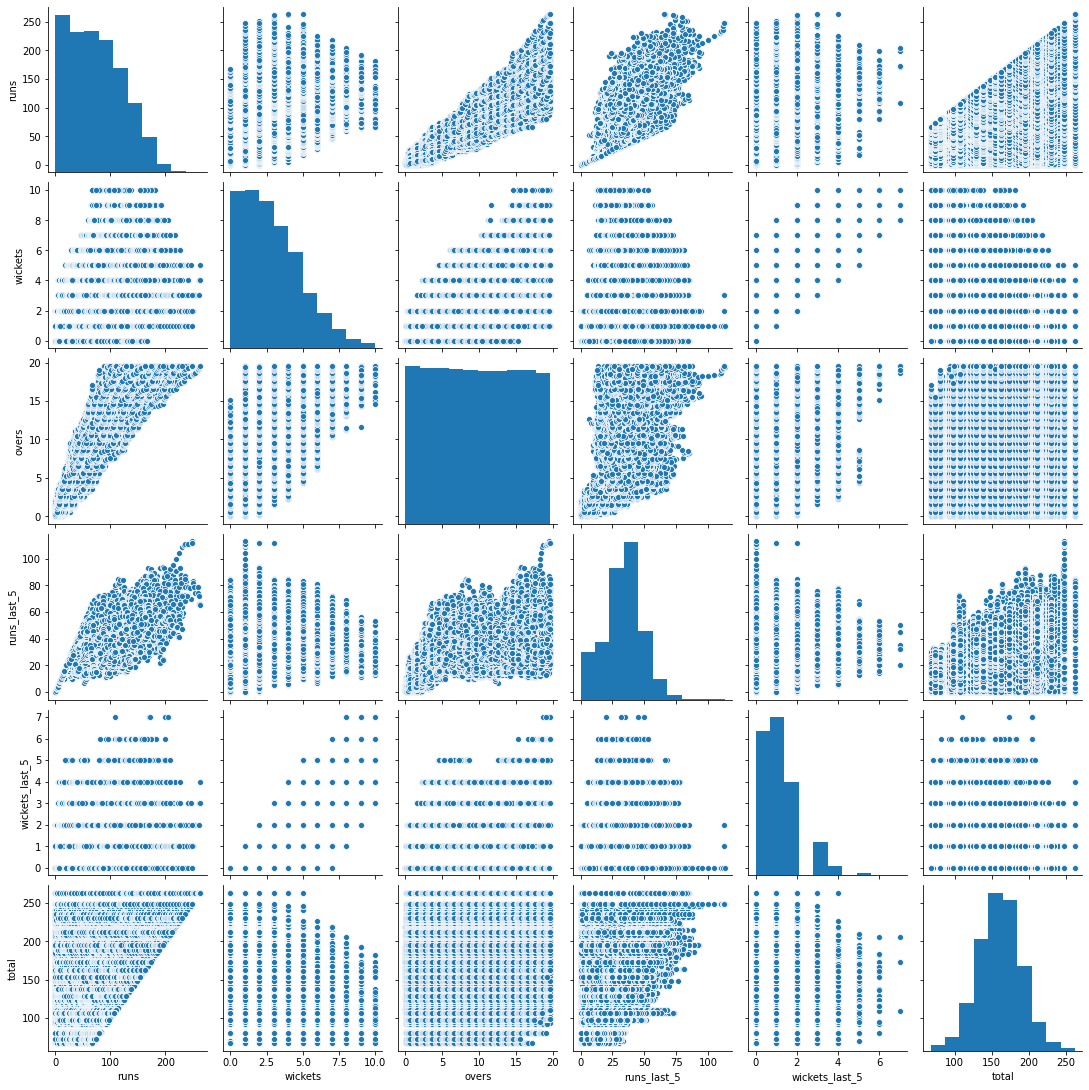

In [8]:
sns.pairplot(ipl_df)

In [9]:
ipl_df.corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.591007,0.938154,0.750565,0.297768,0.254498
wickets,0.591007,1.000000,0.755240,0.242942,0.693740,-0.337343
overs,0.938154,0.755240,1.000000,0.629374,0.382850,0.022282
runs_last_5,0.750565,0.242942,0.629374,1.000000,0.058672,0.368253
wickets_last_5,0.297768,0.693740,0.382850,0.058672,1.000000,-0.273475
total,0.254498,-0.337343,0.022282,0.368253,-0.273475,1.000000


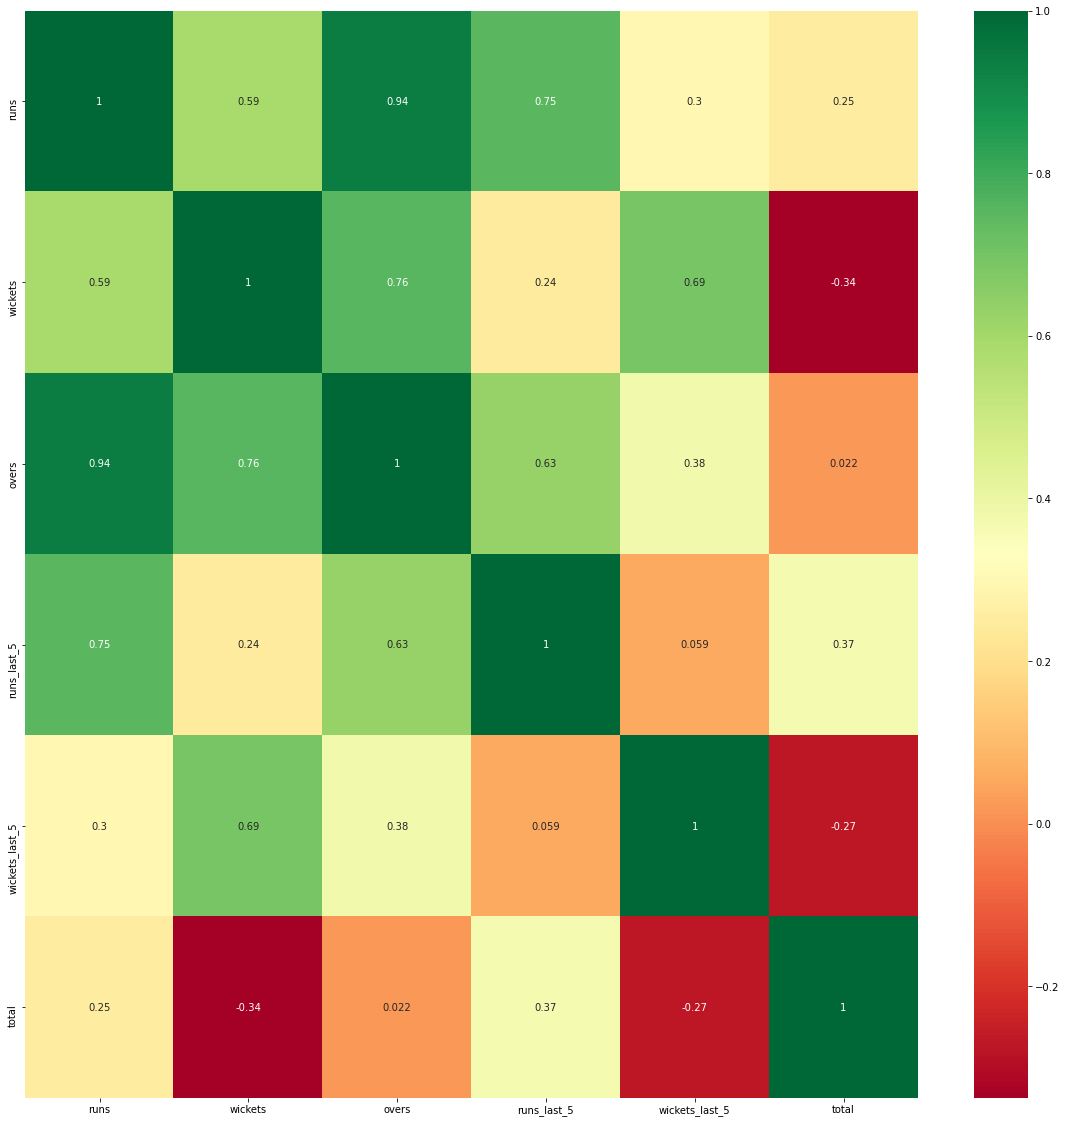

In [10]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = ipl_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ipl_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
team_names = ['Chennai Super Kings','Delhi Daredevils','Mumbai Indians', 'Kings XI Punjab','Kolkata Knight Riders',  
              'Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']

In [12]:
ipl_df = ipl_df[(ipl_df['bat_team'].isin(team_names)) & (ipl_df['bowl_team'].isin(team_names))]

In [13]:
# Removing the first 5 overs data in every match
ipl_df = ipl_df[ipl_df['overs']>=5.0]

In [14]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_ipl_df = pd.get_dummies(data=ipl_df, columns=['bat_team', 'bowl_team'])

In [15]:
encoded_ipl_df = encoded_ipl_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [16]:
X = encoded_ipl_df.iloc[:,1:-1]
Y = encoded_ipl_df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)

In [18]:
y_train.head()

27460    146
8166     139
38607    190
20152    132
45634    183
Name: total, dtype: int64

# Feature Importance¶
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.01633084 0.01562613 0.01460075 0.01266106 0.01568998 0.01453684
 0.01565673 0.01039771 0.01153292 0.01302065 0.01468885 0.01390003
 0.01571757 0.01699768 0.01499024 0.01109302 0.0769021  0.23825672
 0.21066709 0.21094845 0.03578465]


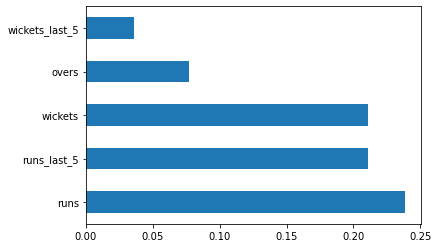

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

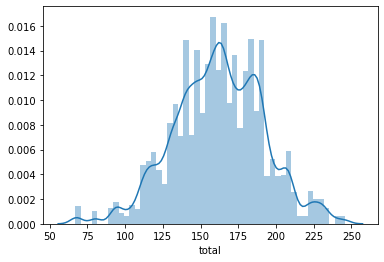

In [22]:
sns.distplot(Y)

In [23]:
X_train.columns

Index(['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5'],
      dtype='object')

# # --- Model Building ---
# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(X_train,y_train)

LinearRegression()

In [25]:
lregressor.coef_

array([ 1.21399363, -2.59998292,  1.2136948 , -3.1245828 ,  2.68229703,
       -3.76159238,  3.4230165 ,  0.95315614,  0.09659032,  0.95910716,
        1.81417402, -3.55793158,  0.25049141,  0.35218231,  0.60793366,
       -0.5225473 , -6.42185989,  0.97028274, -4.94922557, -0.03921439,
       -1.20568641])

In [26]:
lregressor.intercept_

166.94275217763098

In [27]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lregressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6574573447901062


In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lregressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6628399943128609


In [29]:
prediction = lregressor.predict(X_test)

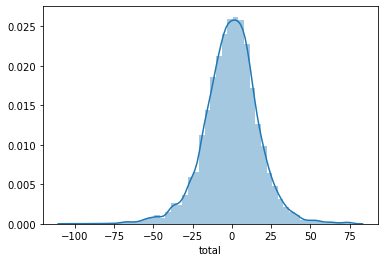

In [30]:
sns.distplot(y_test - prediction)

In [31]:
from sklearn import metrics

In [32]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.091330815558303
MSE: 304.16191350471973
RMSE: 17.440238344263523


In [55]:
import pickle
filename = 'innings_score_prediction_lr_mmodel.pkl'
outfile = open(filename,'wb')
pickle.dump(lregressor,outfile)
outfile.close()

In [34]:
X_test.columns

Index(['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5'],
      dtype='object')

# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [36]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',random_state=0,cv=10)
ridge_regressor.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78323e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8512e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84667e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83327e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8117e-18): result may not be accurate.


RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   random_state=0, scoring='neg_mean_squared_error')

In [37]:
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_score_)

Ridge(alpha=40)
-303.41642010192015


In [38]:
prediction = ridge_regressor.predict(X_test)

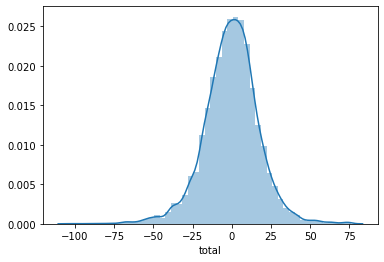

In [39]:
sns.distplot(y_test - prediction)

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.08885296345812
MSE: 304.1518037789976
RMSE: 17.439948502762203


# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [42]:
import warnings
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3387440.628530173, tolerance: 1980.4845795013355
  model = cd_fast.enet_coordinate_descent(
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3246732.5429521287, tolerance: 1985.6693220436337
  model = cd_fast.enet_coordinate_descent(
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3318568.2141550183, tolerance: 1990.9547085440781
  model = cd_fast.enet_coordinate_descent(
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

{'alpha': 0.01}
-303.37835975271435


In [43]:
prediction=lasso_regressor.predict(X_test)

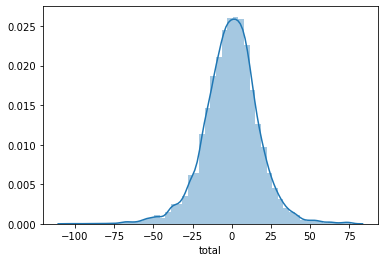

In [44]:
sns.distplot(y_test - prediction)

In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.08659487205274
MSE: 304.14110401638317
RMSE: 17.4396417399092


In [46]:
import pickle

In [47]:
# open a file, where you ant to store the data
file = open('C:\\Users\\pavan\\ML\\IPL\\lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

# Predictions

In [48]:

def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])
  print(lasso_regressor.predict(temp_array))
  # Prediction
  return int(lasso_regressor.predict(temp_array)[0])


In [53]:

final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Chennai Super Kings', overs=14, runs=91, wickets=4, runs_in_prev_5=31, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+5))


[143.19295349]
The final predicted score (range): 138 to 148


In [50]:

final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Rajasthan Royals', overs=14.2, runs=115, wickets=5, runs_in_prev_5=49, wickets_in_prev_5=3)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+5))

[154.35935027]
The final predicted score (range): 149 to 159


In [51]:

final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Rajasthan Royals', overs=7.2, runs=61, wickets=1, runs_in_prev_5=51, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+5))

[169.03552238]
The final predicted score (range): 164 to 174


In [52]:

final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Rajasthan Royals', overs=5, runs=36, wickets=1, runs_in_prev_5=36, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

[159.47026194]
The final predicted score (range): 149 to 164


# Random Forest Regressor